# McDonald's dataset
McDonald's dataset contains information about each product in the McDonald's menu.
It gives information about the proteins, energy, sugar levels, etc. in each and every product in the McDonald's menu.

We aim to gain insight on impact of each food items on comsumers health


### Data source [kaggle](https://www.kaggle.com/datasets/ashpalsingh1525/mcdonaldsdataset/data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, shapiro

In [2]:
food_df = pd.read_csv('mcd.csv')

In [3]:
food_df.head(5)

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description
0,Black Coffee®,200ml,NaN,NaN,No Allergens,6.80,0.00,0.00,0.00,0.00,0.00,1.70,0.00,0.00,0.00,Perfectly brewed for any time of the day.
1,Butter Chicken Grilled Burger,153g,"Premium grilled chicken patty, Shredded onion,...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",357.01,17.06,14.41,4.65,0.00,31.93,39.76,6.55,4.71,919.59,Premium grilled chicken patty topped with makh...
2,Butter Paneer Grilled Burger,142g,"Mildly spiced grilled paneer patty, Shredded o...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",382.26,12.85,17.15,8.29,0.00,6.62,44.12,8.78,5.08,900.37,Mildly spiced grilled paneer patty topped with...
3,Cheesy Fries,150g,"Salted Fries, Smoky Chipotle Sauce","Hi, it’s cheese on this side!",Milk,453.92,7.19,21.10,10.64,0.59,3.89,41.94,0.95,0.40,430.79,The all-time favourite fries with a generous d...
4,Chicken Maharaja Mac®,296g,"Maharaja bun crown, Haberno sauce, Shredded le...",A royal treat.,"Cereal containing gluten, Milk, Soya",689.12,34.00,36.69,10.33,0.25,81.49,55.39,8.92,6.14,1854.71,\n A double-dec...


In [4]:
# rename columns
food_df.rename(columns={'chol': 'cholestrol', 'carbs': 'carbohydrate','sat_fat': 'saturated_fat'}, inplace=True)

food_df.head(5)

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,saturated_fat,trans_fat,cholestrol,carbohydrate,total_sugar,added_sugar,sodium,description
0,Black Coffee®,200ml,NaN,NaN,No Allergens,6.80,0.00,0.00,0.00,0.00,0.00,1.70,0.00,0.00,0.00,Perfectly brewed for any time of the day.
1,Butter Chicken Grilled Burger,153g,"Premium grilled chicken patty, Shredded onion,...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",357.01,17.06,14.41,4.65,0.00,31.93,39.76,6.55,4.71,919.59,Premium grilled chicken patty topped with makh...
2,Butter Paneer Grilled Burger,142g,"Mildly spiced grilled paneer patty, Shredded o...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",382.26,12.85,17.15,8.29,0.00,6.62,44.12,8.78,5.08,900.37,Mildly spiced grilled paneer patty topped with...
3,Cheesy Fries,150g,"Salted Fries, Smoky Chipotle Sauce","Hi, it’s cheese on this side!",Milk,453.92,7.19,21.10,10.64,0.59,3.89,41.94,0.95,0.40,430.79,The all-time favourite fries with a generous d...
4,Chicken Maharaja Mac®,296g,"Maharaja bun crown, Haberno sauce, Shredded le...",A royal treat.,"Cereal containing gluten, Milk, Soya",689.12,34.00,36.69,10.33,0.25,81.49,55.39,8.92,6.14,1854.71,\n A double-dec...


In [5]:
#dropping columns: added_sugar, description, serving_size, tag, saturated_fat, trans_fat
food_df.drop(['added_sugar', 'description', 'serving_size', 'tag', 'saturated_fat', 'trans_fat'], axis=1, inplace=True)

In [6]:
food_df.head(5)

,name,ingredients,allergy,energy,protein,total_fat,cholestrol,carbohydrate,total_sugar,sodium
0,Black Coffee®,NaN,No Allergens,6.80,0.00,0.00,0.00,1.70,0.00,0.00
1,Butter Chicken Grilled Burger,"Premium grilled chicken patty, Shredded onion,...","Cereal containing gluten, Milk, Soya",357.01,17.06,14.41,31.93,39.76,6.55,919.59
2,Butter Paneer Grilled Burger,"Mildly spiced grilled paneer patty, Shredded o...","Cereal containing gluten, Milk, Soya",382.26,12.85,17.15,6.62,44.12,8.78,900.37
3,Cheesy Fries,"Salted Fries, Smoky Chipotle Sauce",Milk,453.92,7.19,21.10,3.89,41.94,0.95,430.79
4,Chicken Maharaja Mac®,"Maharaja bun crown, Haberno sauce, Shredded le...","Cereal containing gluten, Milk, Soya",689.12,34.00,36.69,81.49,55.39,8.92,1854.71


### Health-Related Insights:
- calculating the number of calories in each food item in a new column

In [7]:
food_df['protein_calories'] = food_df['protein'] * 4
food_df['fat_calories'] = food_df['total_fat'] * 9
food_df['carb_calories'] = food_df['carbohydrate'] * 4

# Total calories from macronutrients
food_df['calculated_calories'] = food_df['protein_calories'] + food_df['fat_calories'] + food_df['carb_calories']
food_df.drop(['protein_calories', 'fat_calories', 'carb_calories'], axis=1, inplace=True)

food_df.head()

,name,ingredients,allergy,energy,protein,total_fat,cholestrol,carbohydrate,total_sugar,sodium,calculated_calories
0,Black Coffee®,NaN,No Allergens,6.80,0.00,0.00,0.00,1.70,0.00,0.00,6.80
1,Butter Chicken Grilled Burger,"Premium grilled chicken patty, Shredded onion,...","Cereal containing gluten, Milk, Soya",357.01,17.06,14.41,31.93,39.76,6.55,919.59,356.97
2,Butter Paneer Grilled Burger,"Mildly spiced grilled paneer patty, Shredded o...","Cereal containing gluten, Milk, Soya",382.26,12.85,17.15,6.62,44.12,8.78,900.37,382.23
3,Cheesy Fries,"Salted Fries, Smoky Chipotle Sauce",Milk,453.92,7.19,21.10,3.89,41.94,0.95,430.79,386.42
4,Chicken Maharaja Mac®,"Maharaja bun crown, Haberno sauce, Shredded le...","Cereal containing gluten, Milk, Soya",689.12,34.00,36.69,81.49,55.39,8.92,1854.71,687.77


- Which food items have the least amount of sugar?

In [8]:
least_sugar_content = food_df.groupby('name')['total_sugar'].min().to_frame('least_sugar_content').reset_index().sort_values('least_sugar_content', ascending=True)
least_sugar_content.head(5)

,name,least_sugar_content
0,Black Coffee®,0.00
5,Chicken McNuggets®,0.32
21,Our World Famous Fries®,0.39
3,Cheesy Fries,0.95
24,Spicy Chicken Wrap®,2.52


- creating a new column to calculate the number of calories in each food items

The formula for calulating calories can be found in [wiki how](https://www.wikihow.com/Calculate-Food-Calories#:~:text=If%20the%20item%20you're,are%20always%20measured%20in%20grams)

In [9]:
# Calculate calories for each macronutrient
food_df['protein_calories'] = food_df['protein'] * 4
food_df['fat_calories'] = food_df['total_fat'] * 9
food_df['carb_calories'] = food_df['carbohydrate'] * 4

# Total calories from macronutrients
food_df['calculated_calories'] = food_df['protein_calories'] + food_df['fat_calories'] + food_df['carb_calories']

# droping columns for new calories from macronutrients
food_df.drop(['protein_calories', 'fat_calories', 'carb_calories'], axis=1, inplace=True)

food_df.head()

,name,ingredients,allergy,energy,protein,total_fat,cholestrol,carbohydrate,total_sugar,sodium,calculated_calories
0,Black Coffee®,NaN,No Allergens,6.80,0.00,0.00,0.00,1.70,0.00,0.00,6.80
1,Butter Chicken Grilled Burger,"Premium grilled chicken patty, Shredded onion,...","Cereal containing gluten, Milk, Soya",357.01,17.06,14.41,31.93,39.76,6.55,919.59,356.97
2,Butter Paneer Grilled Burger,"Mildly spiced grilled paneer patty, Shredded o...","Cereal containing gluten, Milk, Soya",382.26,12.85,17.15,6.62,44.12,8.78,900.37,382.23
3,Cheesy Fries,"Salted Fries, Smoky Chipotle Sauce",Milk,453.92,7.19,21.10,3.89,41.94,0.95,430.79,386.42
4,Chicken Maharaja Mac®,"Maharaja bun crown, Haberno sauce, Shredded le...","Cereal containing gluten, Milk, Soya",689.12,34.00,36.69,81.49,55.39,8.92,1854.71,687.77


- Defining categories for calorie levels

In [10]:
# Define a function to categorize calorie levels
def categorize_calories(calories):
    if calories < 100:
        return 'Low'
    elif 100 <= calories <= 400:
        return 'Moderate'
    else:
        return 'High'

# Applying the function to create a new column
food_df['calorie_category'] = food_df['calculated_calories'].apply(categorize_calories)
food_df.head(5)

,name,ingredients,allergy,energy,protein,total_fat,cholestrol,carbohydrate,total_sugar,sodium,calculated_calories,calorie_category
0,Black Coffee®,NaN,No Allergens,6.80,0.00,0.00,0.00,1.70,0.00,0.00,6.80,Low
1,Butter Chicken Grilled Burger,"Premium grilled chicken patty, Shredded onion,...","Cereal containing gluten, Milk, Soya",357.01,17.06,14.41,31.93,39.76,6.55,919.59,356.97,Moderate
2,Butter Paneer Grilled Burger,"Mildly spiced grilled paneer patty, Shredded o...","Cereal containing gluten, Milk, Soya",382.26,12.85,17.15,6.62,44.12,8.78,900.37,382.23,Moderate
3,Cheesy Fries,"Salted Fries, Smoky Chipotle Sauce",Milk,453.92,7.19,21.10,3.89,41.94,0.95,430.79,386.42,Moderate
4,Chicken Maharaja Mac®,"Maharaja bun crown, Haberno sauce, Shredded le...","Cereal containing gluten, Milk, Soya",689.12,34.00,36.69,81.49,55.39,8.92,1854.71,687.77,High


- What are the menu item with their calorie count?

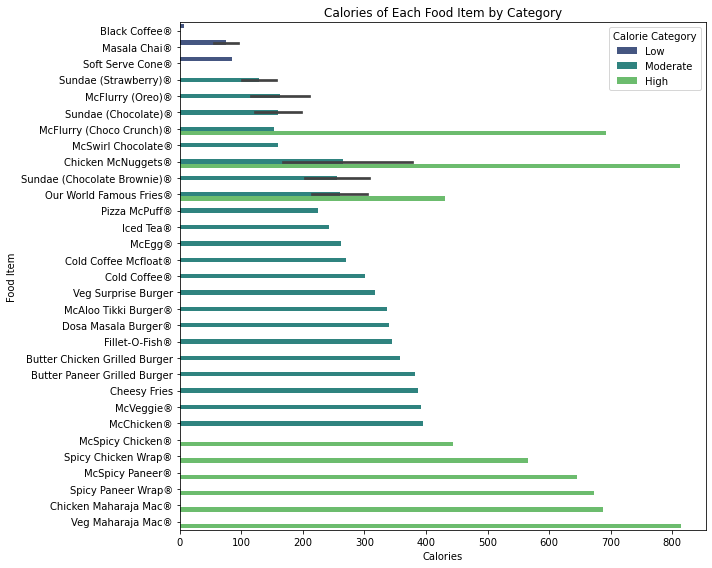

In [11]:
sorted_data = food_df.sort_values(by='calculated_calories')

# Plot a horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(data=sorted_data, y='name', x='calculated_calories', hue='calorie_category', palette='viridis')
plt.title('Calories of Each Food Item by Category')
plt.xlabel('Calories')
plt.ylabel('Food Item')
plt.legend(title='Calorie Category', loc='upper right')
plt.tight_layout()
plt.show()

- What is the count of items in each calorie category

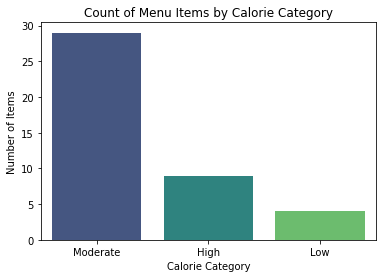

In [12]:
# Count the number of items in each calorie category
category_counts = food_df['calorie_category'].value_counts()

# Plot a bar chart
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Count of Menu Items by Calorie Category')
plt.xlabel('Calorie Category')
plt.ylabel('Number of Items')
plt.show()


- What percentage of the menu could be classified as "healthy" based on specific calories thresholds?

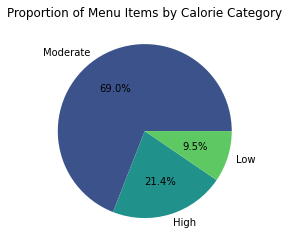

In [13]:
# What percentage of the menu could be classified as "healthy" based on specific calories thresholds?
category_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('viridis', len(category_counts)))
plt.title('Proportion of Menu Items by Calorie Category')
plt.ylabel('') 
plt.show()

###  Correlations

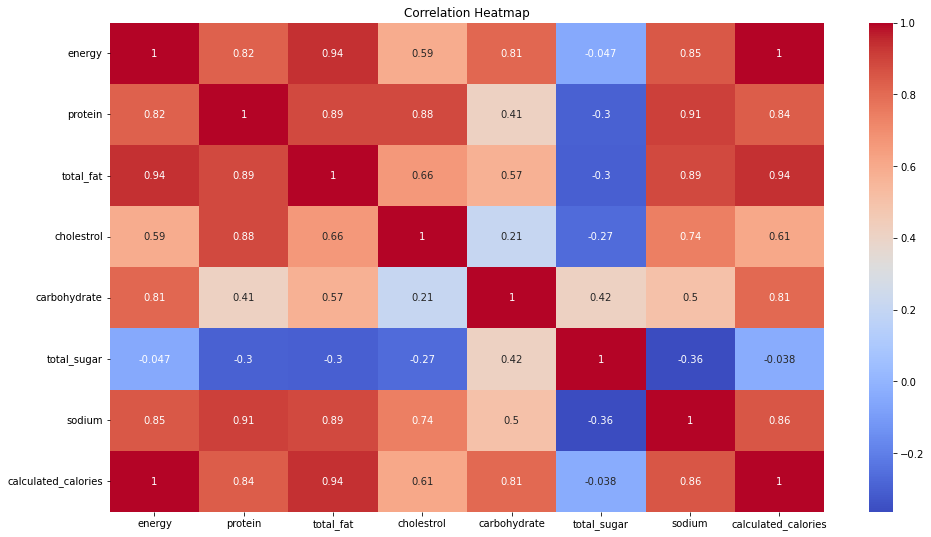

In [14]:
numerical_cols = [
    'energy', 'protein', 'total_fat', 'cholestrol', 'carbohydrate',
    'total_sugar', 'sodium', 'calculated_calories'
]
plt.figure(figsize=(16, 9))
correlation_matrix = food_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- Is there a correlation between calorie count and protein content?

Correlation between calculated_calories and protein: 0.84


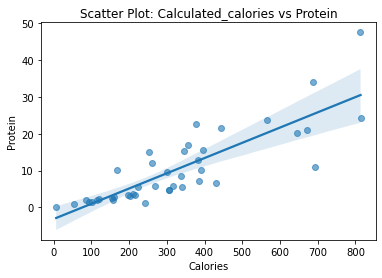

In [15]:
#Is there a correlation between calorie count and protein content?
calories_column = 'calculated_calories'
protein_column = 'protein'

# Calculate correlation coefficient
correlation = food_df[calories_column].corr(food_df[protein_column])
print(f"Correlation between {calories_column} and {protein_column}: {correlation:.2f}")

# Scatter plot with regression line
sns.regplot(data=food_df, x=calories_column, y=protein_column, scatter_kws={'alpha':0.6})
plt.title(f"Scatter Plot: {calories_column.capitalize()} vs {protein_column.capitalize()}")
plt.xlabel("Calories")
plt.ylabel("Protein")
plt.show()


A correlation of 0.84 suggests a strong linear relationship between calculated_calories and protein.
As the protein content increases, the calculated calorie content tends to increase as well
The positive sign indicates that higher protein levels are associated with higher calorie counts in the items.

#### Practical Implications

Protein is a major contributor to the overall calorie count in this dataset.
For food items with high protein content, you can generally expect a higher calorie value.

- How does sugar content relate to calorie count across the menu?

Correlation between total_sugar and calculated_calories: -0.04


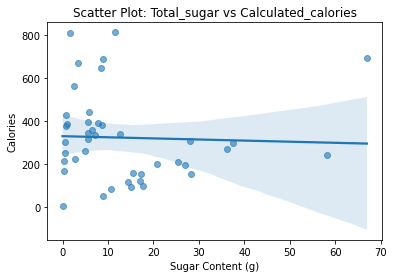

In [16]:
#How does sugar content relate to calorie count across the menu?
sugar_column = 'total_sugar' 
calories_column = 'calculated_calories' 

# Calculate correlation coefficient
correlation = food_df[sugar_column].corr(food_df[calories_column])
print(f"Correlation between {sugar_column} and {calories_column}: {correlation:.2f}")

# Scatter plot with regression line
sns.regplot(data=food_df, x=sugar_column, y=calories_column, scatter_kws={'alpha':0.6})
plt.title(f"Scatter Plot: {sugar_column.capitalize()} vs {calories_column.capitalize()}")
plt.xlabel("Sugar Content (g)")
plt.ylabel("Calories")
plt.show()


A correlation of -0.04 is very close to 0, suggesting that changes in total_sugar have little to no consistent effect on calculated_calories